In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
import pickle 
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,LSTM,Bidirectional

In [2]:
df = pd.read_csv('clean_data.csv',index_col=0)
df.head()

,clean_text,label
0,oily creamy expected ordered try highlight con...,0
1,palette decent price looking different shades ...,0
2,texture concealer pallet fantastic great cover...,0
3,really tell exactly thing powder kind oil ish ...,0
4,little smaller expected okay lasted long time ...,0


In [3]:
df['clean_text'] = df['clean_text'].apply(lambda x:str(x))

In [4]:
x = df['clean_text']
y = df['label']

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.3)

## Tokenization

In [6]:
tok = Tokenizer(oov_token = '<UNK>')

In [7]:
# we fit only on training data and just transform that on testing data

In [8]:
#fitting on training data
tok.fit_on_texts(x_train)

In [9]:
len(tok.word_index)

92705

In [10]:
# just transforming the test data
train_sequences = tok.texts_to_sequences(x_train)
test_sequences = tok.texts_to_sequences(x_test)

In [11]:
with open('filename.pickle', 'wb') as handle:
    pickle.dump(tok, handle, protocol=pickle.HIGHEST_PROTOCOL)


## Padding

(array([77860., 78817., 41276., 23841., 14107.,  8816.,  5736.,  3758.,
         2619.,  1945.]),
 array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.]),
 <BarContainer object of 10 artists>)

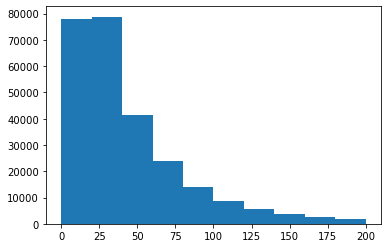

In [12]:
plt.hist(df['clean_text'].apply(lambda x:len(x.split())),range = (0,200))

In [13]:
x_train = pad_sequences(train_sequences,maxlen=100,padding='pre',truncating='pre')
x_test = pad_sequences(test_sequences,maxlen=100,padding='pre',truncating='pre')

## Model Fitting

In [14]:
model = Sequential([
    Embedding(92706,300),
    Bidirectional(LSTM(128)),
    Dense(100,activation='relu'),
    Dense(6,activation='softmax')  
    
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 300)         27811800  
                                                                 
 bidirectional (Bidirectiona  (None, 256)              439296    
 l)                                                              
                                                                 
 dense (Dense)               (None, 100)               25700     
                                                                 
 dense_1 (Dense)             (None, 6)                 606       
                                                                 
Total params: 28,277,402
Trainable params: 28,277,402
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer='adam',loss= 'SparseCategoricalCrossentropy',metrics=['accuracy'])

In [17]:
history = model.fit(x_train,y_train,batch_size=500,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
371/371 [==============================] - 1111s 3s/step - loss: 0.3541 - accuracy: 0.8685 - val_loss: 0.1651 - val_accuracy: 0.9469
Epoch 2/10
371/371 [==============================] - 1126s 3s/step - loss: 0.1162 - accuracy: 0.9632 - val_loss: 0.1631 - val_accuracy: 0.9475
Epoch 3/10
371/371 [==============================] - 1080s 3s/step - loss: 0.0838 - accuracy: 0.9730 - val_loss: 0.1752 - val_accuracy: 0.9458
Epoch 4/10
371/371 [==============================] - 923s 2s/step - loss: 0.0647 - accuracy: 0.9791 - val_loss: 0.1929 - val_accuracy: 0.9447
Epoch 5/10
371/371 [==============================] - 614s 2s/step - loss: 0.0541 - accuracy: 0.9826 - val_loss: 0.2049 - val_accuracy: 0.9441
Epoch 6/10
371/371 [==============================] - 605s 2s/step - loss: 0.0468 - accuracy: 0.9847 - val_loss: 0.2225 - val_accuracy: 0.9419
Epoch 7/10
371/371 [==============================] - 627s 2s/step - loss: 0.0385 - accuracy: 0.9875 - val_loss: 0.2455 - val_accuracy: 0.9

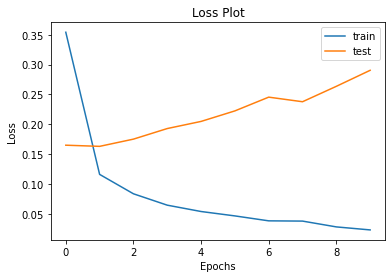

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Plot')
plt.legend(['train','test'])

In [20]:
model.save('biLSTM_Model.h5')